In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

import sys
import pathlib

# in jupyter (lab / notebook), based on notebook path
module_path = str(pathlib.Path.cwd().parents[0] / "py")
# # in standard python
# module_path = str(pathlib.Path.cwd(__file__).parents[0] / "common")

if module_path not in sys.path:
    sys.path.append(module_path)

import common.viz

In [2]:
environment_tag = "sense_t24_random"

agent_list = [
    "constant_c60",
    "nonlinearmean_rsp10",
    "nonlinear_rsp50",
]

In [3]:
# Get experiment name
experiment_list = [environment_tag+'-'+agent for agent in agent_list]

# human readable names for experiments
label_list = agent_list

In [4]:
# Indicate which seed instance to use
# Get seedlist
file = '../seedfile.dat'
with open(file) as f:
    seed_list = []
    for line in f: # read rest of lines
        seed_list.append([int(x) for x in line.split()][0])

In [5]:
# Set mode to train or test
mode = "test"
print(mode)

test


In [6]:
location = "tokyo"

tokyo


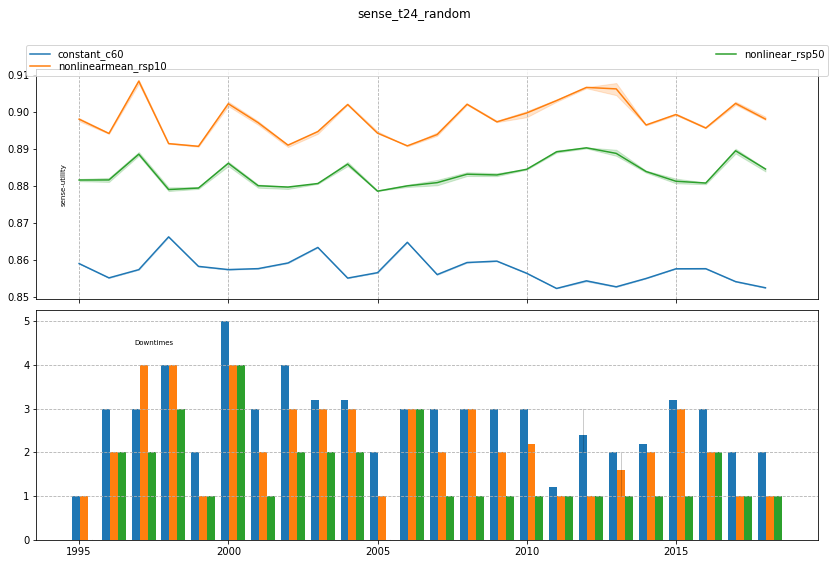

In [7]:
common.viz.compare_agents(results_folder="../results", # the folder holding results of all experiments
                    environment_tag=environment_tag,
                    agent_list=agent_list,
                    label_list=label_list,
                    seed_list=seed_list,
                    mode=mode,
                    location= location)